In [52]:
# NAIVE BAYES CLASSIFIER using SKlearn
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import os
import seaborn as sns

In [53]:
def get_texts(directory):
    texts = []
    for filename in os.listdir(directory):
        if filename.endswith(".txt"):
            with open(os.path.join(directory, filename), 'r') as file:
                texts.append(file.read())
    return texts

In [54]:
# making the dataset
positives = get_texts('review_polarity/txt_sentoken/pos')
negatives = get_texts('review_polarity/txt_sentoken/neg')
df = pd.DataFrame({"data": positives + negatives,
 "target": list(np.ones(len(positives)).astype(int)) + list(np.zeros(len(negatives)).astype(int))})
# df.sample randomly samples rows from a dataframe, 'frac = 1' means all rows are shuffled and returned 
df = df.sample(frac=1, random_state=42).reset_index(drop=True)


In [55]:
# train-test split
X = df['data']
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [56]:
# Scikit-learn's multinomial naive bayes model
# this vectorizer converts the list of texts into sparse representations
vectorizer = CountVectorizer()
# fit_tranform applies dimensionality reduction on X
X_trained_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)
classifier_model = MultinomialNB()
classifier_model.fit(X_trained_vectorized, y_train)

MultinomialNB()

In [57]:
y_pred = classifier_model.predict(X_test_vectorized)

Accuracy: 0.79
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.81      0.80       203
           1       0.80      0.77      0.78       197

    accuracy                           0.79       400
   macro avg       0.79      0.79      0.79       400
weighted avg       0.79      0.79      0.79       400

Confusion Matrix:
[[165  38]
 [ 46 151]]


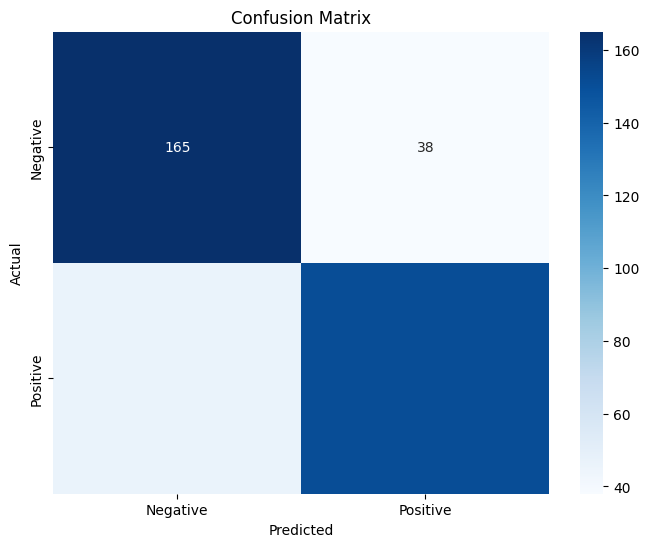

In [58]:
# Output evaluation metrics
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print('Classification Report:')
print(classification_report(y_test, y_pred))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

# plotting the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()